<a href="https://colab.research.google.com/github/igorshpitser/PythonProject/blob/main/FinalProject_Exploratory_data_analysis_for_online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

!pip install unidecode

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Коли видалятимемо дублікати знадобиться
from unidecode import unidecode
import re

%cd /content/drive/MyDrive/MateAcademy/Python/FinalProject

events_df = pd.read_csv("events.csv")
events_df.head()
print(events_df)

products_df = pd.read_csv("products.csv")
products_df.head()
print(products_df)

countries_df = pd.read_csv("countries.csv")
countries_df.head()
print(countries_df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MateAcademy/Python/FinalProject
       Order ID Order Date   Ship Date Order Priority Country Code  \
0     100640618  10/8/2014  10/18/2014              M          NOR   
1     100983083  8/11/2016   8/11/2016              C          SRB   
2     101025998  7/18/2014   8/11/2014              M          NaN   
3     102230632  5/13/2017   6/13/2017              L          MNE   
4     103435266  8/11/2012   9/18/2012              H          SRB   
...         ...        ...         ...            ...          ...   
1325  994504153  1/10/2017   1/13/2017              M          SWE   
1326  994978797  12/5/2014    1/2/2015              H          ITA   
1327  996754205  9/20/2010   9/22/2010              L          RUS   
1328  998043382  6/15/2010    7/3/2010              H          MLT   
1329  999879729  3/31/2012    5/6/2012        

## **Data overview**

* В датасеті **Events** маємо такі поля:
** Order ID
** Order Date (дата замовлення)
** Ship Date (дата відправлення)
** Order Priotity (пріорітет)
** Country Code (Код країни "alpha-3")
** Product ID (Id прокудкту "id")
** Sales Channel (тип замовлення (онлайн/оффлайн))
** Units Sold (проданих одиниць)
** Unit Price (ціна за одиницю(на продаж))
** Unit Cost (собівартість за одиницю)

* В датасеті **Products** маємо такі поля:
** id
** item_type (Тип елемента)

* В датасеті **Countries** маємо такі поля:
** name (Назва країни)
** alpha-2 (Перші 2 букви країни)
** alpha-3 (Перші 3 букви країни)
** region (Регіон, якому знаходиться країна)
** sub-region (Підрегіон, якому знаходиться країна)

*

1.   Events з Products поєднує "Product ID"(id)
2.   Events з Countries поєднує "Country Code"(alpha-3)  

In [ ]:
#Подивись, чи є пропущені значення у кожній таблиці,
#оціни їх долю, спробуй зрозуміти причини їх виникнення.

print("Пропущені знаки:")
print(events_df.isna().sum())
print()
print(products_df.isna().sum())
print()
print(countries_df.isna().sum())
print()

print("% Пропущених значень:")
print(events_df.isna().sum() / events_df.shape[0] * 100)
print()
print(products_df.isna().sum() / products_df.shape[0] * 100)
print()
print(countries_df.isna().sum() / countries_df.shape[0] * 100)

#Заповни або видали пропущені значення, обґрунтувавши свою думку.

events_df["Country Code"].fillna("Unknown", inplace=True)
ecom_events = events_df.dropna()
ecom_products = products_df.dropna()
ecom_countries = countries_df.dropna()

ecom_events.describe()
ecom_products.describe()
ecom_countries.describe()

#Подивись, чи всі типи даних розпізнаються коректно.
#Якщо є розбіжності, потрібно виявити та усунути причини, за потреби, зробити перетворення типів у колонках.

print()
ecom_events.loc[:, 'Order Date'] = pd.to_datetime(ecom_events['Order Date'], errors="coerce")
ecom_events.loc[:, 'Ship Date'] = pd.to_datetime(ecom_events['Ship Date'], errors="coerce")

print()
print(ecom_events.info())
print()
print(ecom_products.info())
print()
print(ecom_countries.info())
print()

# Створюю вже зразу і один датаФрейм

#Досліди дані на наявність дублікатів.
#Зверни увагу, що дублікати можуть траплятися через зайві пробіли (або інші символи) у комірках, розбіжність у великих/малих літерах, схожість літер у кирилиці/латиниці тощо.
#За потреби, зроби перетворення для усунення дублікатів.

import re
from unidecode import unidecode

import re
import pandas as pd
from unidecode import unidecode

def clean_text_columns(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Тільки для текстових стовпців
            df[col] = df[col].astype(str)  # Перетворюємо NaN у рядки
            df[col] = df[col].map(unidecode)  # Транслитерація
            df[col] = df[col].map(lambda x: re.sub(r'[^a-zA-Z0-9\s\-\:]', '', x))  # Залишаємо '-', ':' і інші символи
            df[col] = df[col].map(lambda x: ' '.join(x.split()))  # Видаляємо зайві пробіли
            df[col] = df[col].str.lower()  # Перетворюємо в нижній регістр
        elif df[col].dtype == 'datetime64[ns]':  # Для стовпців з датами
            df[col] = pd.to_datetime(df[col], errors='coerce')  # Перетворюємо на datetime, якщо це потрібно
        elif pd.api.types.is_numeric_dtype(df[col]):  # Для числових стовпців
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Перетворюємо на числа
    return df

ecom_events = clean_text_columns(ecom_events)
ecom_products = clean_text_columns(ecom_products)
ecom_countries = clean_text_columns(ecom_countries)




# Очищаємо пробіли та приводимо до нижнього регістру

#EVENTS
# ecom_events = ecom_events.map(str)
# ecom_events = ecom_events.map(lambda x: x.strip().lower())

duplicate_rows = ecom_events.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())
print()

#PRODUCTS

# ecom_products = ecom_products.map(str)
# ecom_products = ecom_products.map(lambda x: x.strip().lower())

duplicate_rows = ecom_products.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())
print()

#COUNTRIES

# ecom_countries = ecom_countries.map(str)
# ecom_countries = ecom_countries.map(lambda x: x.strip().lower())

duplicate_rows = ecom_countries.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())
print()


# print("% Пропущених значень в новому DataFrame:")
# print(ecom_events.isna().sum() / events_df.shape[0] * 100)
# print()
# print(ecom_products.isna().sum() / products_df.shape[0] * 100)
# print()
# print(ecom_countries.isna().sum() / countries_df.shape[0] * 100)

Пропущені знаки:
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64

id           0
item_type    0
dtype: int64

name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64

% Пропущених значень:
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64

id           0.0
item_type    0.0
dtype: float64

name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null

<ipython-input-4-a1d331cb9ef2>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  events_df["Country Code"].fillna("Unknown", inplace=True)
<ipython-input-4-a1d331cb9ef2>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')  # Перетворюємо на

## **Data cleaning.**

№1
* Бачимо, що загалом пропущених даних майже немає, окрім Country Code
* Відповідно, відсоток цих даних є незначним всюди менше 1%, окрім вищезагаданого Country Code

№2
* Через висновки в пункті №1, заповнив пропущені значення в стовпці Сountry Code
* У всіх решту стовпцях були видалені пропущені значення

№3
* Некоректні типи даних є в двох стовпцях, а саме: Order Date i Ship Date
* Перетворив на коректний

№4
* Очищаємо пробіли та приводимо до нижнього регістру, та переводимо все на латиницю
* Видаляємо дублікати

№5
* Дослівши дані на наявність аномалій, я їх не виявив


In [ ]:
#Видали непотрібні для аналізу колонки.
#За потреби, зроби перейменування колонок.

df_merged = pd.merge(ecom_events, ecom_products, left_on="Product ID", right_on = "id", how="left")
df_final = pd.merge(df_merged, ecom_countries, left_on="Country Code", right_on="alpha-3", how="left")
df_final.drop(["id", "alpha-3"], axis=1, inplace=True)
print(df_final)

#Розпочни з ключових метрик діяльності компанії:
#загальна кількість замовлень, загальний прибуток, загальна кількість охоплених країн тощо (придумай інші метрики).

df_final.info()

total_order = df_final['Order ID'].value_counts()
total_profit = (df_final['Unit Price'] - df_final['Unit Cost']).sum()
total_countries = df_final['Country Code'].nunique()
total_priority = df_final['Order Priority'].value_counts()
first_order = df_final['Order Date'].min()
last_order = df_final['Order Date'].max()
total_region = df_final['region'].nunique()

print()
print(f"Total order: {total_order}")
print(f"Total profit: {total_profit}")
print(f"Total countries: {total_countries}")
print(f"Total proirity: {total_priority}")
print(f"First order: {first_order}")
print(f"Last order: {last_order}")
print(f"Total region: {total_region}")


#Проаналізуй продажі (доходи, витрати, прибутки, популярність товарів) та зроби відповідні візуалізації в розрізі:

#категорій товарів;

df_final["Revenue"] = df_final['Units Sold']*df_final['Unit Price']
df_final["Cost"] = df_final['Units Sold']*df_final['Unit Cost']
df_final["Profit"] = (df_final['Unit Price']-df_final['Unit Cost'])*df_final['Units Sold']
#popular = units sold


       Order ID           Order Date            Ship Date Order Priority  \
0     100640618  2014-10-08 00:00:00  2014-10-18 00:00:00              m   
1     100983083  2016-08-11 00:00:00  2016-08-11 00:00:00              c   
2     101025998  2014-07-18 00:00:00  2014-08-11 00:00:00              m   
3     102230632  2017-05-13 00:00:00  2017-06-13 00:00:00              l   
4     103435266  2012-08-11 00:00:00  2012-09-18 00:00:00              h   
...         ...                  ...                  ...            ...   
1323  994504153  2017-01-10 00:00:00  2017-01-13 00:00:00              m   
1324  994978797  2014-12-05 00:00:00  2015-01-02 00:00:00              h   
1325  996754205  2010-09-20 00:00:00  2010-09-22 00:00:00              l   
1326  998043382  2010-06-15 00:00:00  2010-07-03 00:00:00              h   
1327  999879729  2012-03-31 00:00:00  2012-05-06 00:00:00              m   

     Country Code  Product ID Sales Channel  Units Sold  Unit Price  \
0             no

## **Data analysis and visualization**
№1
* Було з'єднано три датасети в один DataFrame
* Видалено 2 не потрібних стовпці, які були дублікатом для інших 2

№2
* Дослідив діяльність компанії знайшовши ключові метрики:
* Total order
* Total profit
* Total countries
* Total proirity
* First order
* Last order
* Total region

№3
Створив наступні стовпці для аналізу:

* Прибуток
* Витрати
* Дохід
* Популярність товарів


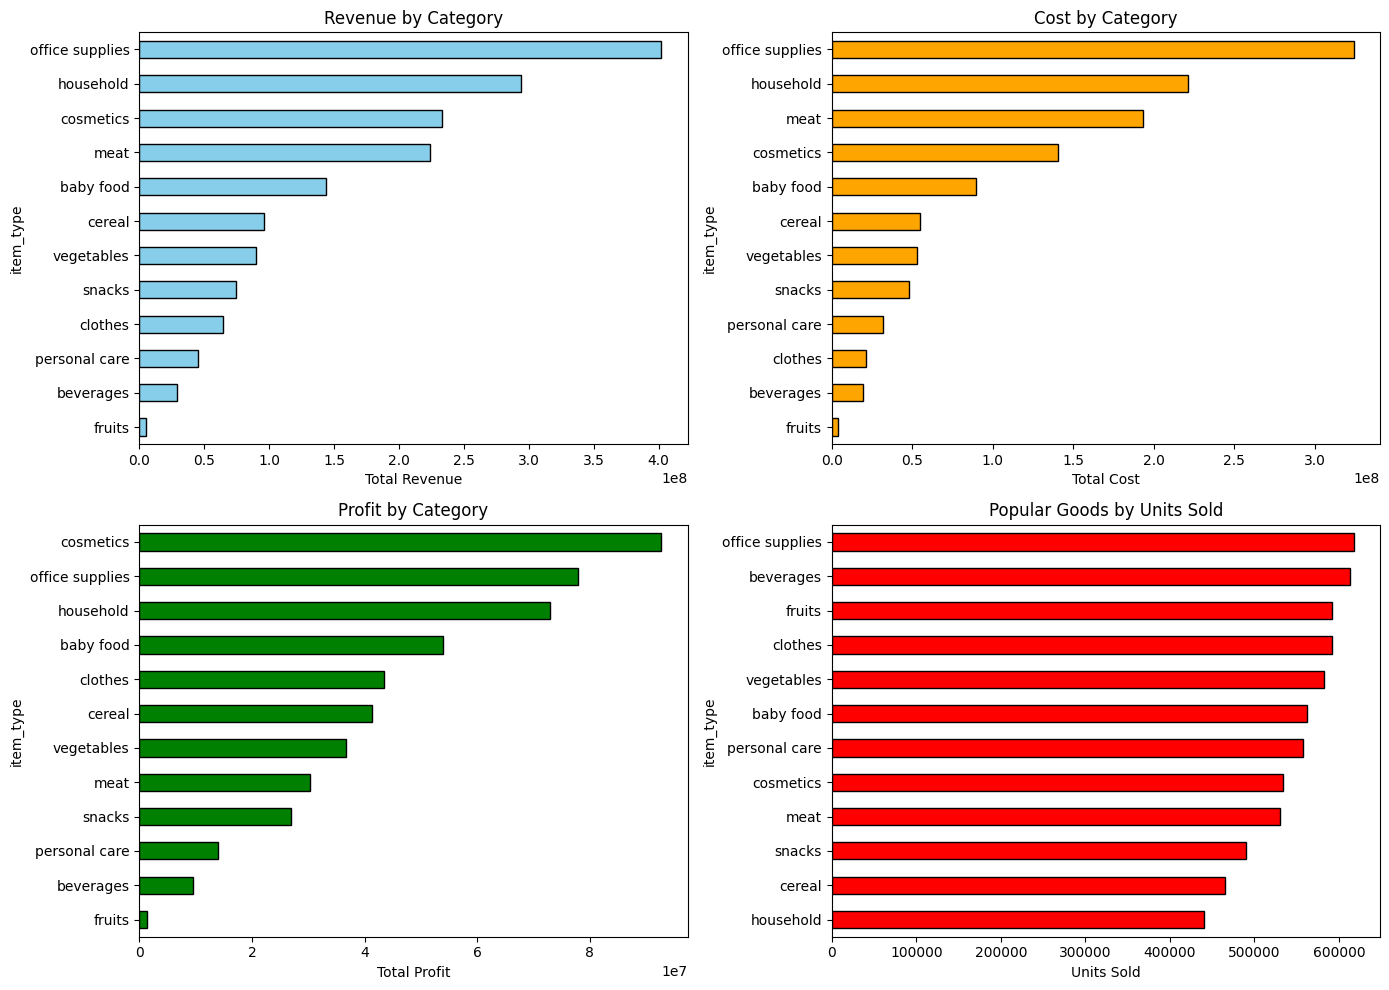

In [ ]:
revenue_by_category = df_final.groupby('item_type')["Revenue"].sum().sort_values(ascending=True)
cost_by_category = df_final.groupby('item_type')["Cost"].sum().sort_values(ascending=True)
profit_by_category = df_final.groupby('item_type')["Profit"].sum().sort_values(ascending=True)
popular_goods = df_final.groupby('item_type')['Units Sold'].sum().sort_values(ascending=True)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Візуалізація Revenue by Category
revenue_by_category.plot(kind='barh', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title("Revenue by Category")
axes[0, 0].set_xlabel("Total Revenue")

# Візуалізація Cost by Category
cost_by_category.plot(kind='barh', ax=axes[0, 1], color='orange', edgecolor='black')
axes[0, 1].set_title("Cost by Category")
axes[0, 1].set_xlabel("Total Cost")

# Візуалізація Profit by Category
profit_by_category.plot(kind='barh', ax=axes[1, 0], color='green', edgecolor='black')
axes[1, 0].set_title("Profit by Category")
axes[1, 0].set_xlabel("Total Profit")

# Візуалізація Popular Goods
popular_goods.plot(kind='barh', ax=axes[1, 1], color='red', edgecolor='black')
axes[1, 1].set_title("Popular Goods by Units Sold")
axes[1, 1].set_xlabel("Units Sold")

plt.tight_layout()
plt.show()


№4.1
Погрупував по **категоріях** наступні стовпці:

* Прибуток
* Витрати
* Дохід
* Популярність товарів

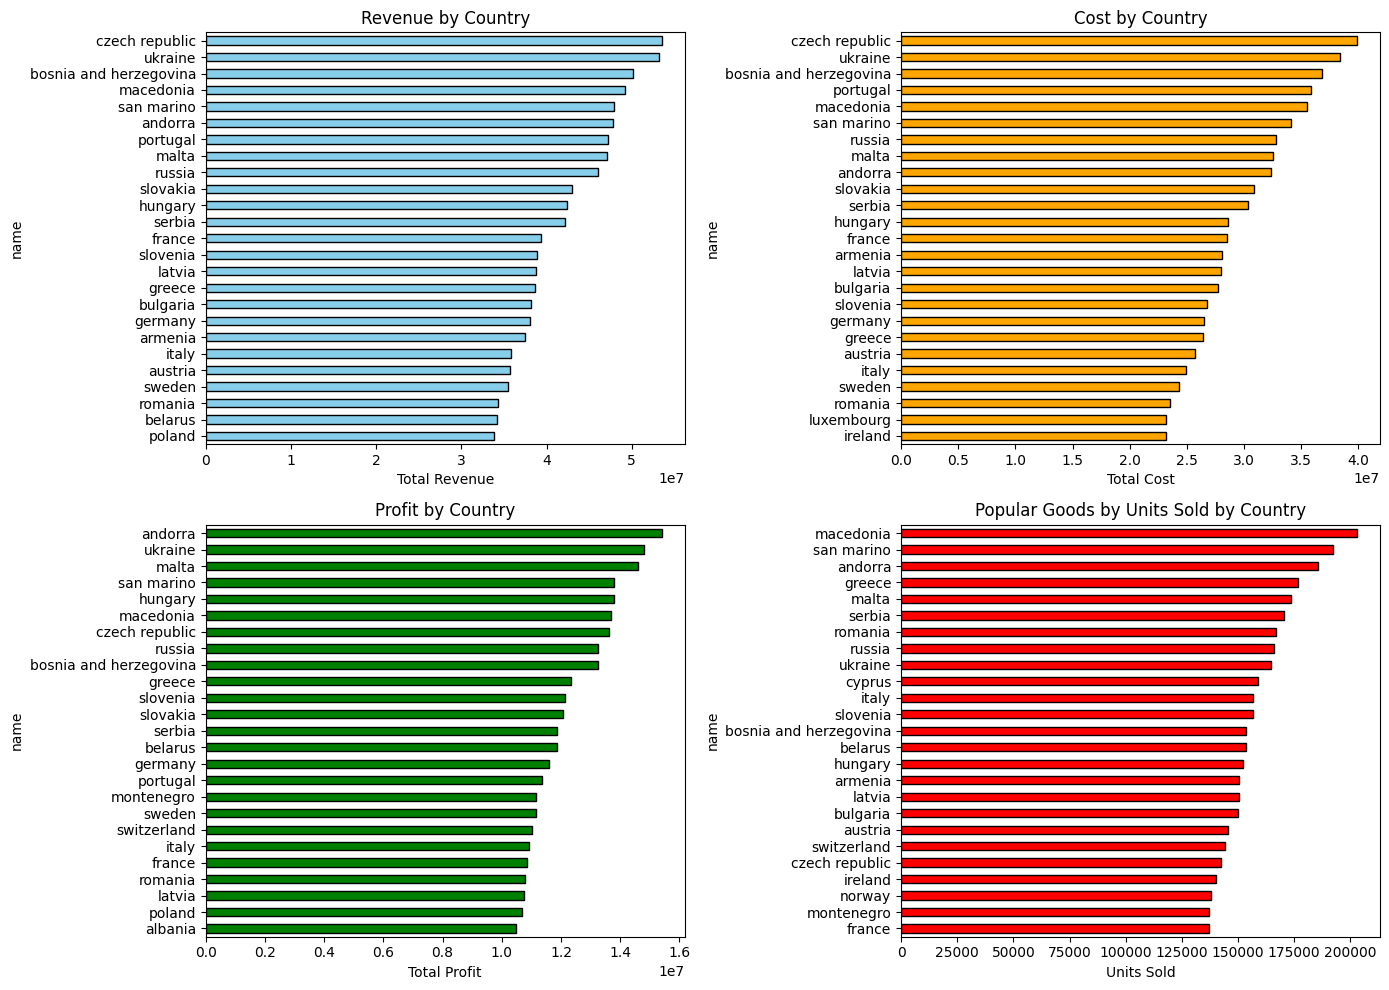

In [ ]:
revenue_by_category = df_final.groupby('name')["Revenue"].sum().nlargest(25).sort_values(ascending=True)
cost_by_category = df_final.groupby('name')["Cost"].sum().nlargest(25).sort_values(ascending=True)
profit_by_category = df_final.groupby('name')["Profit"].sum().nlargest(25).sort_values(ascending=True)
popular_goods = df_final.groupby('name')['Units Sold'].sum().nlargest(25).sort_values(ascending=True)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Візуалізація Revenue by Country
revenue_by_category.plot(kind='barh', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title("Revenue by Country")
axes[0, 0].set_xlabel("Total Revenue")


# Візуалізація Cost by Country
cost_by_category.plot(kind='barh', ax=axes[0, 1], color='orange', edgecolor='black')
axes[0, 1].set_title("Cost by Country")
axes[0, 1].set_xlabel("Total Cost")


# Візуалізація Profit by Country
profit_by_category.plot(kind='barh', ax=axes[1, 0], color='green', edgecolor='black')
axes[1, 0].set_title("Profit by Country")
axes[1, 0].set_xlabel("Total Profit")


# Візуалізація Popular Goods
popular_goods.plot(kind='barh', ax=axes[1, 1], color='red', edgecolor='black')
axes[1, 1].set_title("Popular Goods by Units Sold by Country")
axes[1, 1].set_xlabel("Units Sold")


plt.tight_layout()
plt.show()

№4.2
Погрупував по **країнах** наступні стовпці:

* Прибуток
* Витрати
* Дохід
* Популярність товарів

Виводимо топ-25 країн

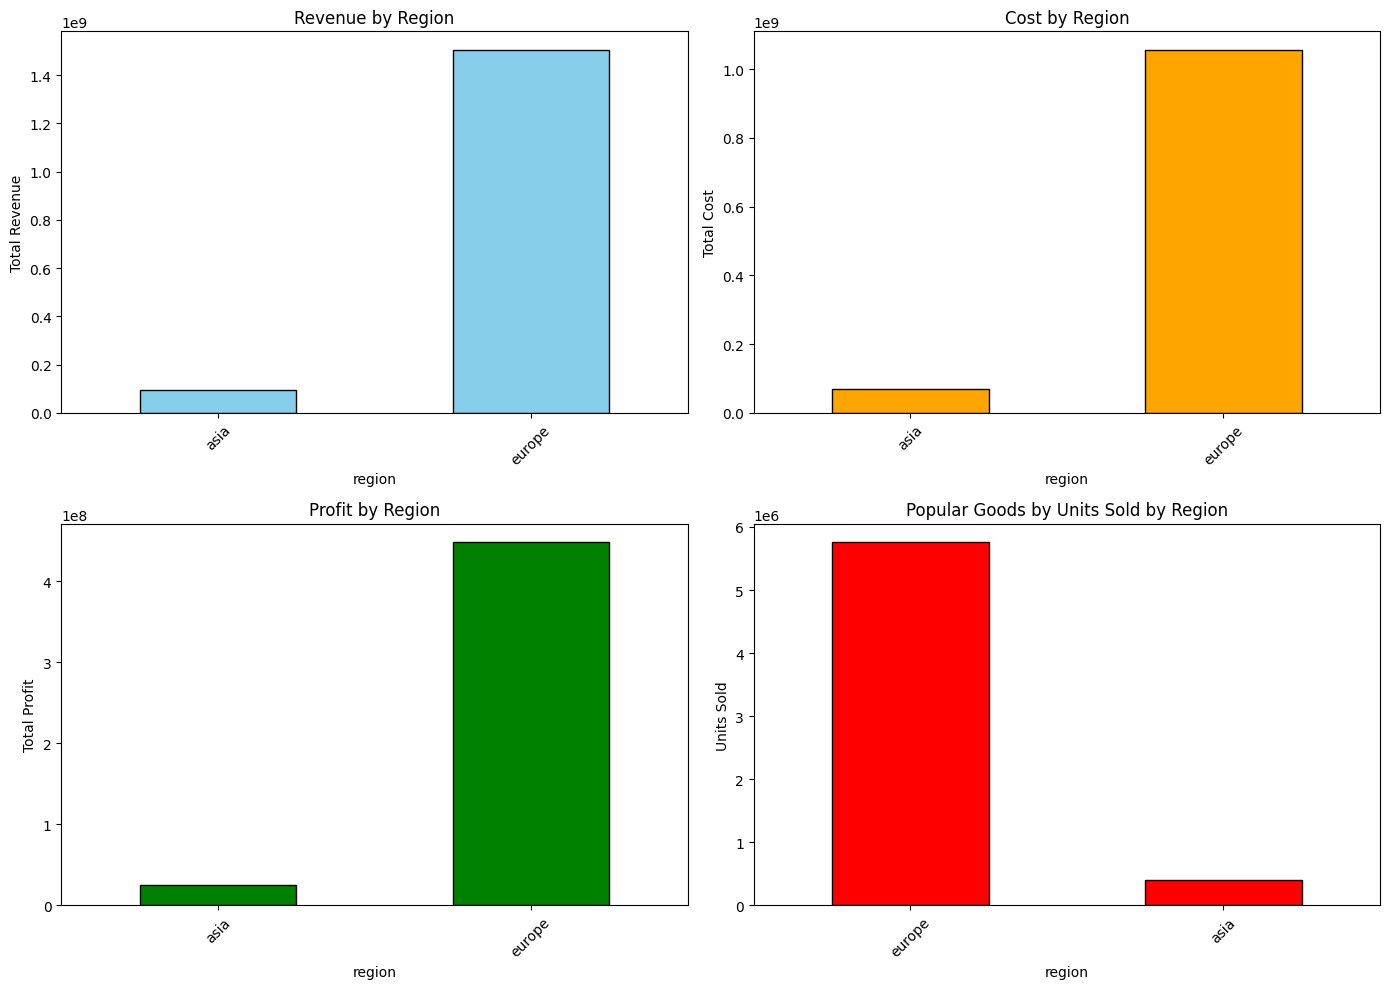

In [ ]:
revenue_by_category = df_final.groupby('region')["Revenue"].sum()
cost_by_category = df_final.groupby('region')["Cost"].sum()
profit_by_category = df_final.groupby('region')["Profit"].sum()
popular_goods = df_final.groupby('region')['Units Sold'].sum().sort_values(ascending=False)


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Візуалізація Revenue by Region
revenue_by_category.plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title("Revenue by Region")
axes[0, 0].set_ylabel("Total Revenue")
axes[0, 0].tick_params(axis='x', rotation=45)

# Візуалізація Cost by Region
cost_by_category.plot(kind='bar', ax=axes[0, 1], color='orange', edgecolor='black')
axes[0, 1].set_title("Cost by Region")
axes[0, 1].set_ylabel("Total Cost")
axes[0, 1].tick_params(axis='x', rotation=45)

# Візуалізація Profit by Region
profit_by_category.plot(kind='bar', ax=axes[1, 0], color='green', edgecolor='black')
axes[1, 0].set_title("Profit by Region")
axes[1, 0].set_ylabel("Total Profit")
axes[1, 0].tick_params(axis='x', rotation=45)

# Візуалізація Popular Goods
popular_goods.plot(kind='bar', ax=axes[1, 1], color='red', edgecolor='black')
axes[1, 1].set_title("Popular Goods by Units Sold by Region")
axes[1, 1].set_ylabel("Units Sold")
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

№4.3
Погрупував по **регіонах** наступні стовпці:

* Прибуток
* Витрати
* Дохід
* Популярність товарів

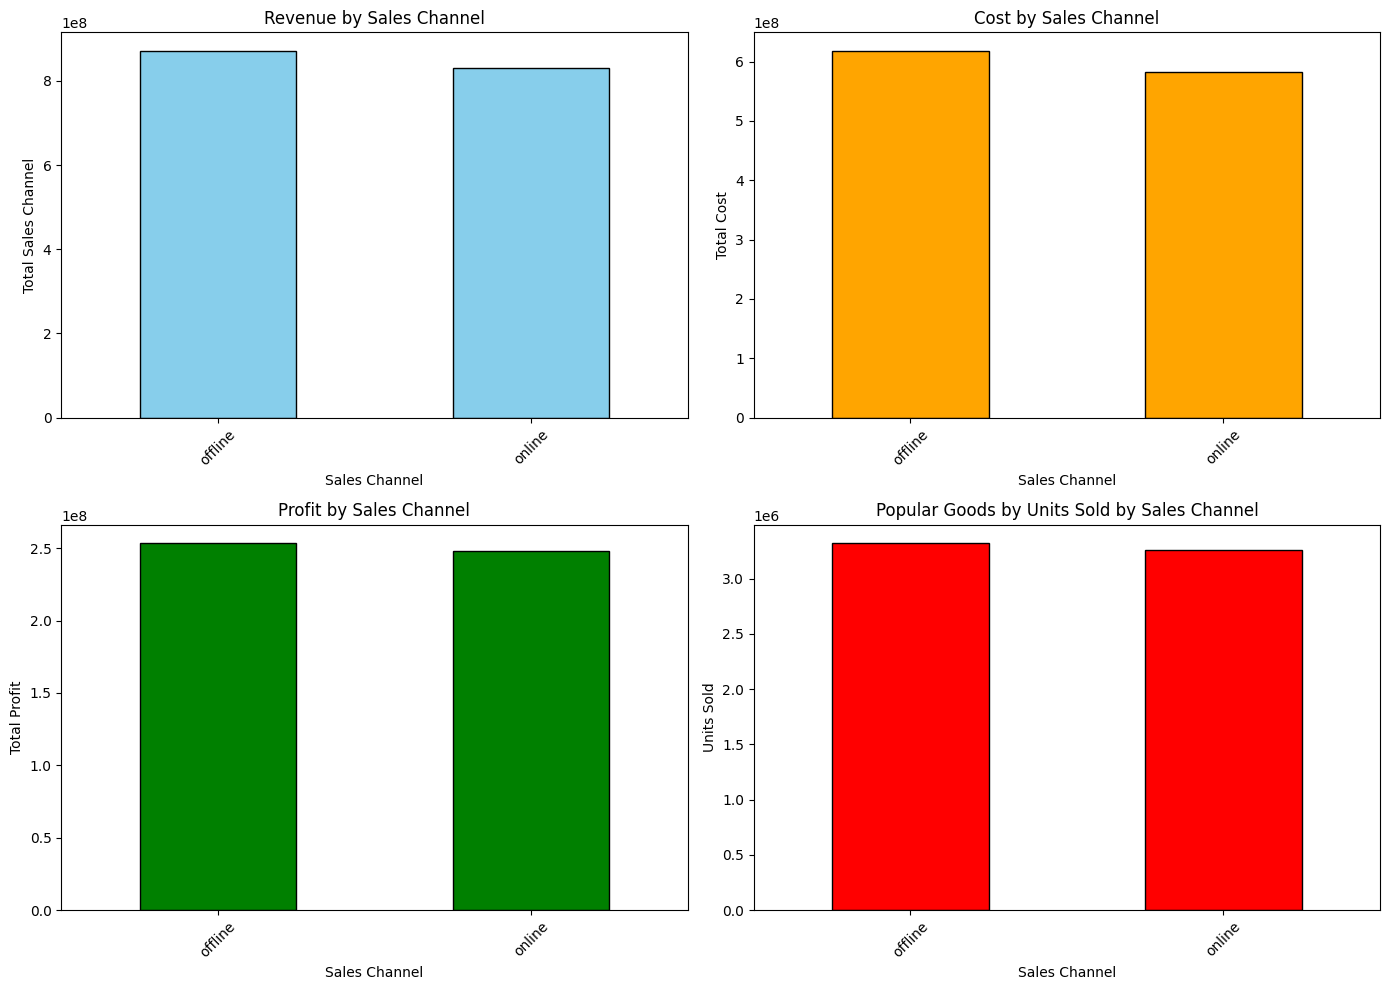

In [ ]:
revenue_by_category = df_final.groupby('Sales Channel')["Revenue"].sum()
cost_by_category = df_final.groupby('Sales Channel')["Cost"].sum()
profit_by_category = df_final.groupby('Sales Channel')["Profit"].sum()
popular_goods = df_final.groupby('Sales Channel')['Units Sold'].sum().sort_values(ascending=False)


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Візуалізація Revenue by Sales Channel
revenue_by_category.plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title("Revenue by Sales Channel")
axes[0, 0].set_ylabel("Total Sales Channel")
axes[0, 0].tick_params(axis='x', rotation=45)

# Візуалізація Cost by Sales Channel
cost_by_category.plot(kind='bar', ax=axes[0, 1], color='orange', edgecolor='black')
axes[0, 1].set_title("Cost by Sales Channel")
axes[0, 1].set_ylabel("Total Cost")
axes[0, 1].tick_params(axis='x', rotation=45)

# Візуалізація Profit by Sales Channel
profit_by_category.plot(kind='bar', ax=axes[1, 0], color='green', edgecolor='black')
axes[1, 0].set_title("Profit by Sales Channel")
axes[1, 0].set_ylabel("Total Profit")
axes[1, 0].tick_params(axis='x', rotation=45)

# Візуалізація Popular Goods
popular_goods.plot(kind='bar', ax=axes[1, 1], color='red', edgecolor='black')
axes[1, 1].set_title("Popular Goods by Units Sold by Sales Channel")
axes[1, 1].set_ylabel("Units Sold")
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

№4.4
Погрупував по **канал продажу** (онлайн/оффлайн) наступні стовпці:

* Прибуток
* Витрати
* Дохід
* Популярність товарів

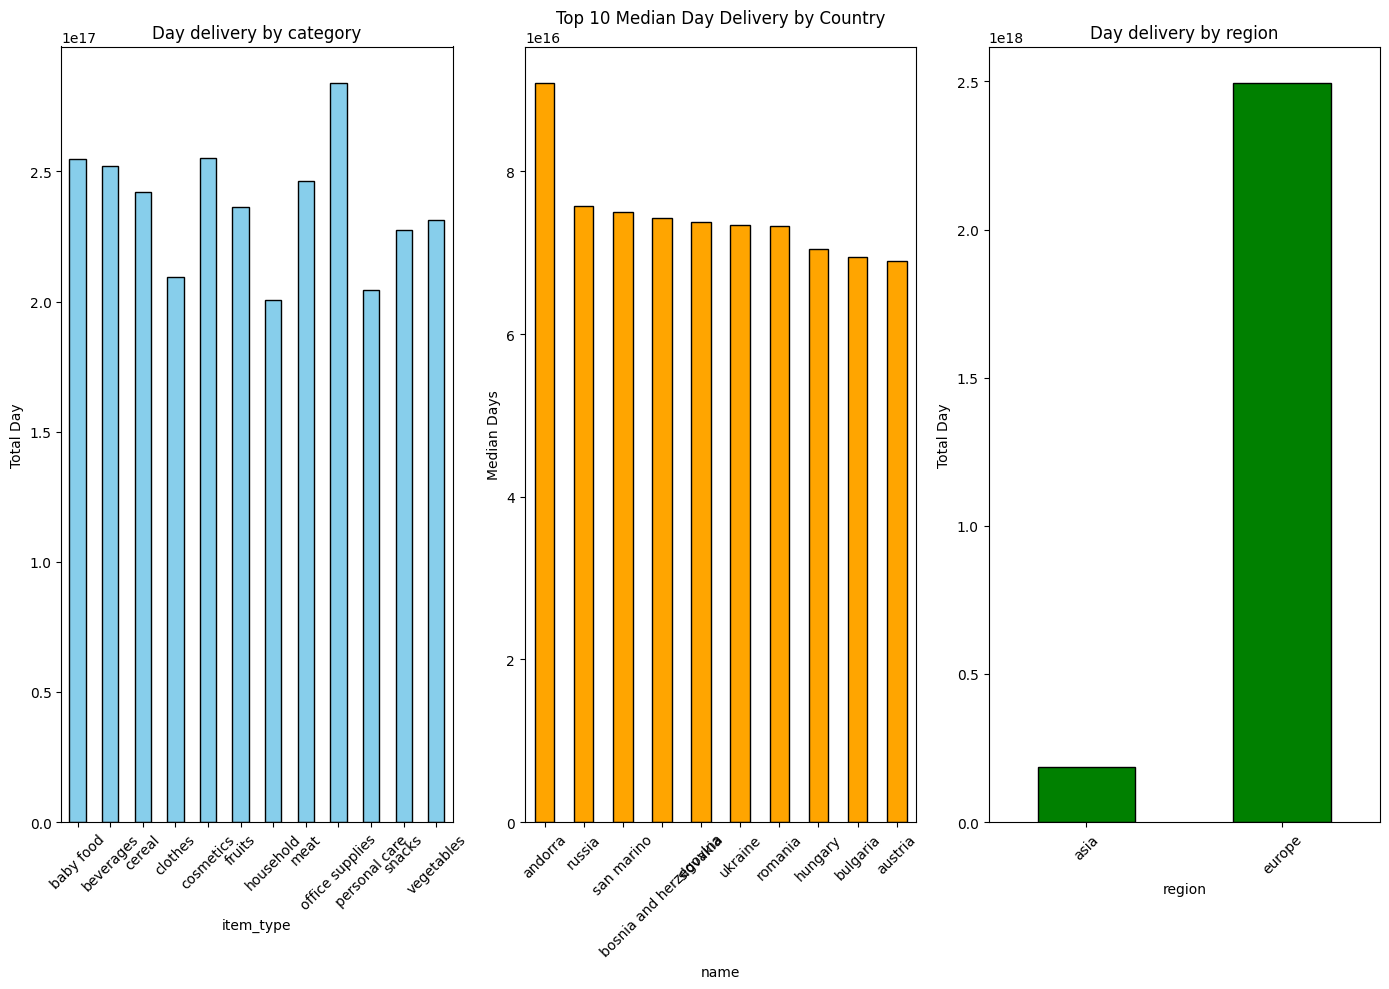

In [ ]:
df_final['Order Date'] = pd.to_datetime(df_final['Order Date'].astype(str).str.strip(), errors="coerce")
df_final['Ship Date'] = pd.to_datetime(df_final['Ship Date'].astype(str).str.strip(), errors="coerce")

df_final = df_final.convert_dtypes()
#df_final.info()

df_final["day_delivery"] = df_final['Ship Date']-df_final['Order Date']

# Рахуємо час в розрізі категорій
day_delivery_category = df_final.groupby("item_type")["day_delivery"].sum()
# Рахуємо час в розрізі країн
day_delivery_name = df_final.groupby("name")["day_delivery"].sum()
# Рахуємо час в розрізі регіону
day_delivery_region = df_final.groupby("region")["day_delivery"].sum()

# print(f"Day of delivery by Category: {day_delivery_category}")
# print(f"Day of delivery by Country: {day_delivery_name}")
# print(f"Day of delivery by Region: {day_delivery_region}")


fig, axes = plt.subplots(1, 3, figsize=(14, 10))

#
day_delivery_category.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title("Day delivery by category")
axes[0].set_ylabel("Total Day")
axes[0].tick_params(axis='x', rotation=45)

# Взяв медіану для кількості днів доставки
top_10_median_delivery = day_delivery_name.groupby('name').median().nlargest(10)

top_10_median_delivery.plot(kind='bar', ax=axes[1], color='orange', edgecolor='black')
axes[1].set_title("Top 10 Median Day Delivery by Country")
axes[1].set_ylabel("Median Days")
axes[1].tick_params(axis='x', rotation=45)

#
day_delivery_region.plot(kind='bar', ax=axes[2], color='green', edgecolor='black')
axes[2].set_title("Day delivery by region")
axes[2].set_ylabel("Total Day")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

№5
* Шукали кількість днів від дня замовлення до дня його відвантаження
* Результати зроблені в розрізі: категорій, країн та регіону

* Також для країн виводжу тільки 10 по медіані, бо їх дуже багато і складно вмістити в графік

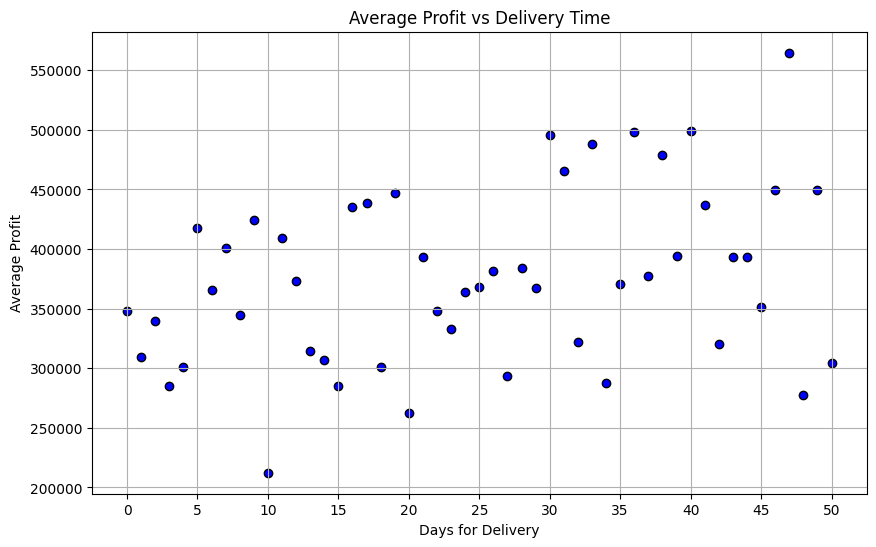

In [ ]:
#Проаналізуй, чи залежить прибуток від часу, необхідного на відвантаження товару.

# Обчислюємо середній прибуток для кожного дня доставки
profit_by_delivery = df_final.groupby("day_delivery")["Profit"].mean().reset_index()

# Побудова scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(profit_by_delivery["day_delivery"], profit_by_delivery["Profit"], color="blue", edgecolor="black")

plt.title("Average Profit vs Delivery Time")
plt.xlabel("Days for Delivery")
plt.ylabel("Average Profit")
plt.grid(True)

plt.xticks(np.arange(profit_by_delivery["day_delivery"].min(),
                      profit_by_delivery["day_delivery"].max() + 1, 5))

plt.show()




№6
**Чи залежить прибуток від часу відвантаження?**

* Можемо побачити, що майже всі стовпці перевищують позначку 300тис.,
* Я б не сказав, що чим швидше відвантажити продукт, тим більше прибутку буде
* Навіть навпаки, чимдовше відбувалось відвантаження тим більші прибутки були
* Проте тільки 6 днів в проміжку [0-25 днів] відрізку був прибуток вище 400тис
* В проміжку [25-50 днів] 12 днів прибуток склав вище 400тис

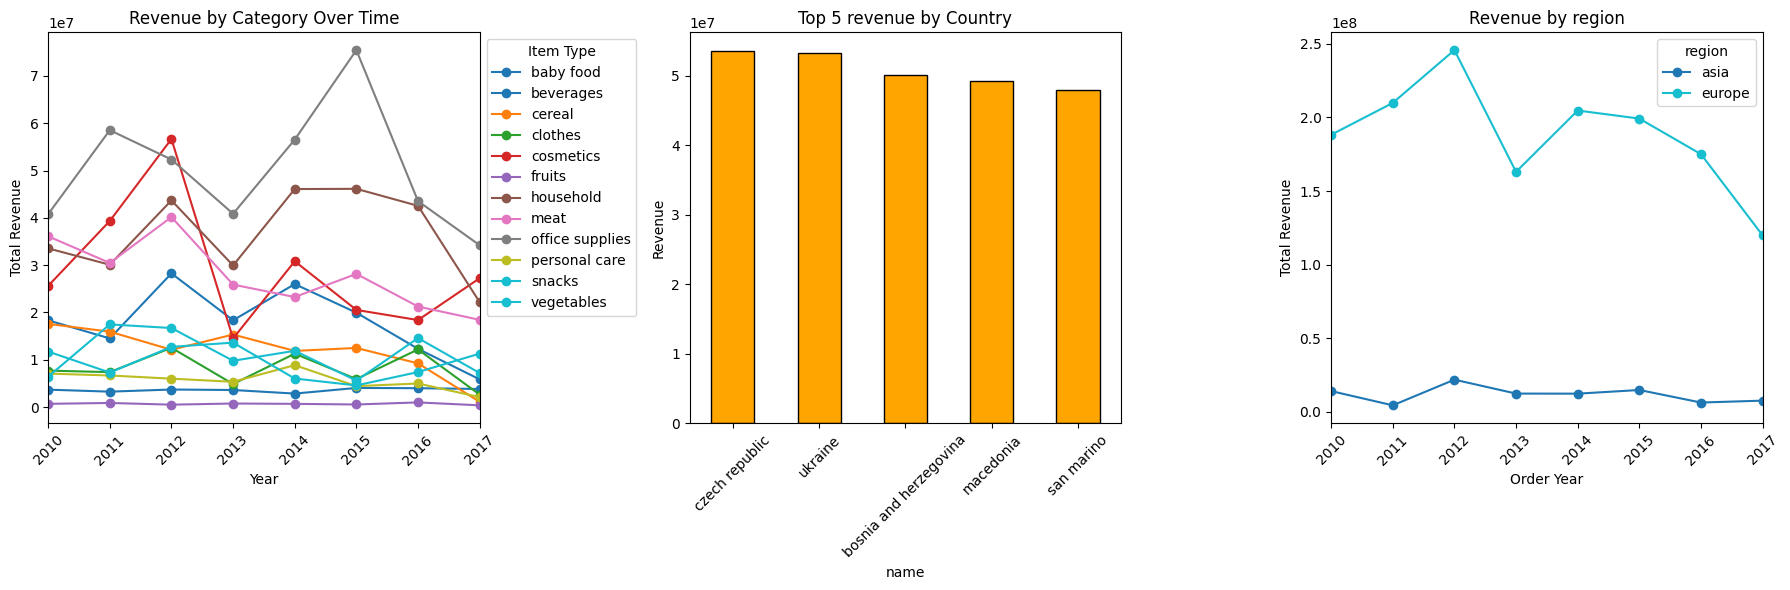

In [ ]:
# Проаналізуй за допомогою візуалізації динаміку продажів (у часі):
#y розрізі категорій товарів, країн, регіонів, визнач основні тенденції.

df_final["Order Date"] = pd.to_datetime(df_final["Order Date"], errors="coerce")
df_final["Order Year"] = df_final["Order Date"].dt.to_period("Y")  # Групуємо за місяцем

sales_by_category = df_final.groupby(["Order Year", "item_type"])["Revenue"].sum().reset_index()
sales_by_country = df_final.groupby(["Order Year", "name"])["Revenue"].sum().reset_index()
sales_by_region = df_final.groupby(["Order Year", "region"])["Revenue"].sum().reset_index()


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Тут використовуються зведені таблиці
sales_by_category_pivot = sales_by_category.pivot(index="Order Year", columns="item_type", values="Revenue")
sales_by_category_pivot.plot(kind='line', ax=axes[0], colormap="tab10", marker="o")

axes[0].set_title("Revenue by Category Over Time")
axes[0].set_ylabel("Total Revenue")
axes[0].set_xlabel("Year")
axes[0].tick_params(axis="x", rotation=45)  # Підписи повертаємо під кутом
axes[0].legend(title="Item Type", bbox_to_anchor=(1, 1))  # Легенда за межами графіка

#
top_5_countries = sales_by_country.groupby("name")["Revenue"].sum().nlargest(5)

top_5_countries.plot(kind='bar', ax=axes[1], color='orange', edgecolor='black')
axes[1].set_title("Top 5 revenue by Country")
axes[1].set_ylabel("Revenue")
axes[1].tick_params(axis='x', rotation=45)

#
sales_by_region_pivot = sales_by_region.pivot(index="Order Year", columns="region", values="Revenue")
sales_by_region_pivot.plot(kind='line', ax=axes[2], colormap="tab10", marker="o")

axes[2].set_title("Revenue by region")
axes[2].set_ylabel("Total Revenue")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


№7
* Використаємо зведені таблиці, щоб за допомогою них проаналізувати динаміку продажів (у часі)
* На графіку можемо побачити, що найбільш прибутковими були такі категорії:

1.   Household
2.   Office supplies

* Проаналізував топ-5 країн за продажами
* Бачимо, що Європа в декілька разів випереджає Азію



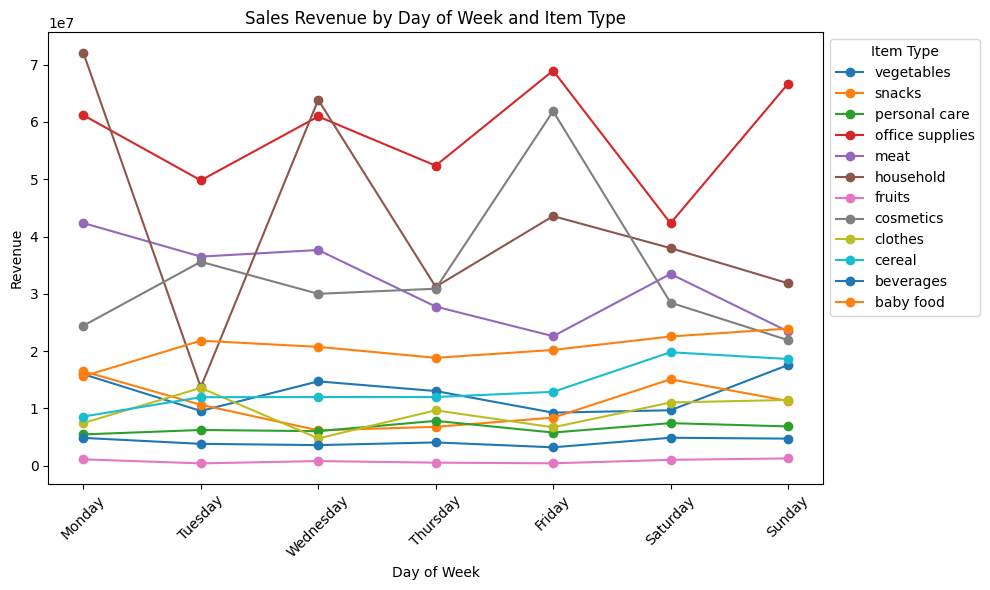

In [ ]:
#Проведи аналіз продажів товарів за днями тижня. Чи можна деякі товари вважати сезонними?

df_final["Day of Week"] = df_final['Order Date'].dt.day_name()

sales_by_day_of_week = df_final.groupby(['Day of Week', "item_type"])["Revenue"].sum().reset_index()
# print(sales_by_day_of_week)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_of_week["Day of Week"] = pd.Categorical(sales_by_day_of_week["Day of Week"], categories=day_order, ordered=True)
sales_by_day_of_week = sales_by_day_of_week.sort_values("Day of Week")

fig, ax = plt.subplots(figsize=(10, 6))

for item_type in sales_by_day_of_week['item_type'].unique():
    data = sales_by_day_of_week[sales_by_day_of_week['item_type'] == item_type]
    ax.plot(data['Day of Week'], data['Revenue'], marker='o', label=item_type)

ax.set_title("Sales Revenue by Day of Week and Item Type")
ax.set_ylabel("Revenue")
ax.set_xlabel("Day of Week")
ax.legend(title="Item Type", bbox_to_anchor=(1, 1))  # Легенда для різних товарів
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* **office supplies** - найчастіше купують вкінці тижня(коли воно найбльше знадобиться на наступний тиждень)
* **meat** - на початку тижня в понеділок
* **household** - в понеділок і середу(ймовірно на наступний тиждень)
* **cosmetics** - найчастіше в п'ятницю (ймовірно на вихідні, на якісь зустрічі)
* **baby food** - майже завжди одинакові покупки